# All final plots and analyses for figure 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib

### Figure 2A - Heterogenous pseudobulks in training and testing for GrooD models

In [3]:
simple_pb = pd.read_csv('../grood_runs/benchmark/new_Hao_pb_tests/Hao-2_notarget_pseudobulks_Hao_2_train_Hao-2_notarget_pseudobulk_proprotions/evaluation/predictions_merged.csv', index_col=0)
simple_pb['data'] = 'canonical'
indiv_pb = pd.read_csv('../grood_runs/benchmark/new_Hao_pb_tests/Hao-2_individual_pseudobulks_Hao_2_train_Hao-2_individual_pseudobulk_proprotions/evaluation/predictions_merged.csv', index_col=0)
indiv_pb['data'] = 'individual-specific'
cond_pb = pd.read_csv('../grood_runs/benchmark/new_Hao_pb_tests/Hao-2_condition_pseudobulks_Hao_2_train_Hao-2_condition_pseudobulk_proprotions/evaluation/predictions_merged.csv', index_col=0)
cond_pb['data'] = 'condition-specific'
cond_pb.head()

,tool,B cells,CD4 T cells,CD8 T cells,DC,Monocytes,NK cells,Tregs,Unknown,data
sample,,,,,,,,,,
Batch2_sample_1,GrooD_Individual,0.291699,0.008641,0.015189,0.197409,0.081553,0.382241,0.023268,0,condition-specific
Batch2_sample_2,GrooD_Individual,0.003678,0.055284,0.027250,0.186015,0.027688,0.630093,0.039505,0,condition-specific
Batch2_sample_3,GrooD_Individual,0.063826,0.484703,0.019544,0.083355,0.114696,0.108813,0.013294,0,condition-specific
Batch2_sample_4,GrooD_Individual,0.301046,0.382543,0.010818,0.031961,0.156615,0.003211,0.013131,0,condition-specific
Batch2_sample_5,GrooD_Individual,0.099662,0.092179,0.006394,0.293710,0.004511,0.483834,0.019710,0,condition-specific


In [4]:
simple_gt = pd.read_csv('../grood_runs/benchmark/pseudobulk_data/pseudobulk_data_random_proportions/Hao-2_notarget_pseudobulk_proprotions.csv', index_col=0)
simple_gt['data'] = 'canonical'
indiv_gt = pd.read_csv('../grood_runs/benchmark/pseudobulk_data/pseudobulk_data_random_proportions/Hao-2_individual_pseudobulk_proprotions.csv', index_col=0)
indiv_gt['data'] = 'individual-specific'
cond_gt = pd.read_csv('../grood_runs/benchmark/pseudobulk_data/pseudobulk_data_random_proportions/Hao-2_condition_pseudobulk_proprotions.csv', index_col=0)
cond_gt['data'] = 'condition-specific'
cond_gt.head()

,B cells,CD4 T cells,CD8 T cells,DC,Monocytes,NK cells,Tregs,data
Batch2_sample_1,0.327968,0.000000,0.012072,0.187123,0.078471,0.376258,0.018109,condition-specific
Batch2_sample_2,0.000000,0.056225,0.028112,0.170683,0.030120,0.688755,0.026104,condition-specific
Batch2_sample_3,0.062374,0.629779,0.022133,0.062374,0.110664,0.102616,0.010060,condition-specific
Batch2_sample_4,0.309859,0.450704,0.016097,0.030181,0.179074,0.000000,0.014085,condition-specific
Batch2_sample_5,0.118712,0.098592,0.002012,0.303823,0.000000,0.450704,0.026157,condition-specific


In [5]:
comb_df = pd.concat([simple_pb, indiv_pb, cond_pb], axis=0)
comb_df['Sample'] = comb_df.index.tolist()
comb_df.drop(['Unknown'], axis =1, inplace=True)
comb_df

,tool,B cells,CD4 T cells,CD8 T cells,DC,Monocytes,NK cells,Tregs,data,Sample
sample,,,,,,,,,,
Sample_1,GrooD_Individual,0.068810,0.241317,0.009526,0.300314,0.210392,0.006867,0.023664,canonical,Sample_1
Sample_2,GrooD_Individual,0.267969,0.164772,0.033887,0.039333,0.283789,0.159080,0.027194,canonical,Sample_2
Sample_3,GrooD_Individual,0.039588,0.374574,0.020933,0.003197,0.187497,0.316576,0.013939,canonical,Sample_3
Sample_4,GrooD_Individual,0.006167,0.030219,0.019260,0.507877,0.406366,0.015622,0.014489,canonical,Sample_4
Sample_5,GrooD_Individual,0.599812,0.275626,0.002691,0.051947,0.048830,0.003368,0.017727,canonical,Sample_5
...,...,...,...,...,...,...,...,...,...,...
Batch1_sample_21,GrooD,0.038693,0.092499,0.406941,0.210110,0.009165,0.021786,0.220806,condition-specific,Batch1_sample_21
Batch1_sample_22,GrooD,0.114927,0.044758,0.358914,0.123361,0.086799,0.149774,0.109240,condition-specific,Batch1_sample_22
Batch1_sample_23,GrooD,0.048989,0.113593,0.030580,0.030009,0.419230,0.250089,0.107510,condition-specific,Batch1_sample_23


In [6]:
comb_gt = pd.concat([simple_gt, indiv_gt, cond_gt], axis=0)
comb_gt['Sample'] = comb_gt.index.tolist()
comb_gt

,B cells,CD4 T cells,CD8 T cells,DC,Monocytes,NK cells,Tregs,data,Sample
Sample_1,0.072435,0.354125,0.012072,0.317907,0.225352,0.000000,0.018109,canonical,Sample_1
Sample_2,0.269076,0.198795,0.028112,0.036145,0.283133,0.158635,0.026104,canonical,Sample_2
Sample_3,0.032193,0.464789,0.022133,0.000000,0.175050,0.295775,0.010060,canonical,Sample_3
Sample_4,0.000000,0.042254,0.016097,0.472837,0.434608,0.020121,0.014085,canonical,Sample_4
Sample_5,0.610442,0.253012,0.002008,0.042169,0.066265,0.000000,0.026104,canonical,Sample_5
...,...,...,...,...,...,...,...,...,...
Batch1_sample_21,0.044266,0.074447,0.462777,0.213280,0.004024,0.030181,0.171026,condition-specific,Batch1_sample_21
Batch1_sample_22,0.110442,0.034137,0.351406,0.122490,0.098394,0.114458,0.168675,condition-specific,Batch1_sample_22
Batch1_sample_23,0.058586,0.080808,0.036364,0.032323,0.466667,0.216162,0.109091,condition-specific,Batch1_sample_23
Batch1_sample_24,0.080321,0.090361,0.018072,0.176707,0.116466,0.371486,0.146586,condition-specific,Batch1_sample_24


In [7]:
# Generate QC metrics per cell type and tool

from scipy import stats

def getCorr(df, groundTruth):

    """
    Computes correlation and error metrics for predicitions vs. ground-truth as stored in the MasterTable
    df: predictions
    groundTruth
    """


    rsquared = []
    cccs = []
    rmses = []
    spearmans = []
    percent_dev = []
    absol_dev = []

    # Concordance correlation coefficient
    def ccc(x_data,y_data):
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rhoc = 2*sxy / (np.var(x_data) + np.var(y_data) + (np.mean(x_data) - np.mean(y_data))**2)
        return rhoc


    # Pearson Correlation Coefficient
    def r(x_data,y_data):
        ''' Pearson Correlation Coefficient'''
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rho = sxy / (np.std(x_data)*np.std(y_data))
        return rho


    # RMSE
    def rmse(x_data,y_data):
        MSE = np.mean(np.square((np.array(x_data)-np.array(y_data))))
        RMSE = np.sqrt(MSE)
        return RMSE

    # Spearmans rank correlation    
    def spearman(x_data, y_data):
        spearmanCorr, _ = stats.spearmanr(np.array(x_data), np.array(y_data))
        return spearmanCorr
    
    # Percent deviation function
    def frac_deviation(x_data, y_data):
        frac_devs = np.mean(np.divide((np.array(y_data) - np.array(x_data)),np.array(x_data), where=(np.array(x_data)!=0)))
        return frac_devs # for sparse data, quite some data points might be excluded due to the removal of 0-divisions from the mean
    
    # Absolute deviation function
    def abs_deviation(x_data, y_data):
        abs_devs = np.mean(abs(np.array(y_data) - np.array(x_data)))
        return abs_devs

    samples = groundTruth.index.tolist()

    for sample in samples:
        
        xdata = df.loc[sample].tolist()
        ydata = groundTruth.loc[sample].tolist()
        b = r(xdata, ydata)
        rsquared.append(b)
        s = spearman(xdata, ydata)
        spearmans.append(s)
        c = ccc(xdata, ydata)
        cccs.append(c)
        a = rmse(xdata, ydata)
        rmses.append(a)
        f = frac_deviation(xdata, ydata)
        percent_dev.append(f)
        g = abs_deviation(xdata, ydata)
        absol_dev.append(g)

    DF = pd.concat([pd.Series(rsquared), pd.Series(spearmans), pd.Series(cccs), pd.Series(rmses), pd.Series(percent_dev), pd.Series(absol_dev)], axis = 1, ignore_index = True)
    DF.columns = ['PCC', 'SCC', 'CCC', 'RMSE', 'RD', 'MAD']
    DF.index = samples

    return DF

In [ ]:
CELL_COLS = ["B cells","CD4 T cells","CD8 T cells","DC","Monocytes","NK cells","Tregs"]

import numpy as np
import pandas as pd

CELL_COLS = ["B cells","CD4 T cells","CD8 T cells","DC","Monocytes","NK cells","Tregs"]

def align_pred_and_gt_per_row(pred, groundTruth, cell_cols=CELL_COLS):
    """
    Returns:
      X: predictions features (index = pred_row_id)
      Y: ground-truth features replicated to each prediction row (same index)
      meta: metadata per prediction row (tool, Sample, etc.) for later joining
    """

    gt = groundTruth.copy()
    if "Sample" in gt.columns:
        gt = gt.set_index("Sample", drop=False)
    gt_feat = gt[cell_cols].copy()
    gt_feat.columns = [f"{cell_col}_gt" for cell_col in cell_cols]

    p = pred.copy()
    p = p.reset_index(drop=False)
    p["pred_row_id"] = np.arange(len(p), dtype=int)

    if "Sample" not in p.columns:
        raise ValueError("pred must contain a 'Sample' column to merge with groundTruth.")

    m = p.merge(
        gt_feat,
        left_on="Sample",
        right_index=True,
        how="left"
    )

    X = m.set_index("pred_row_id")[cell_cols].copy()

    Y = m.set_index("pred_row_id")[gt_feat.columns.tolist()].copy()

    meta = m.set_index("pred_row_id")[["tool", "Sample"]].copy()
    for c in ["data"]:
        if c in m.columns:
            meta[c] = m.set_index("pred_row_id")[c]

    X = X.reindex(columns=cell_cols)
    Y.columns = [col[:-3] for col in Y.columns.tolist()]
    Y = Y.reindex(columns=cell_cols)

    return X, Y, meta, m

metrics_list = []

X_all, Y_all, meta_all, gt_feat = align_pred_and_gt_per_row(comb_df, comb_gt, cell_cols=CELL_COLS)

for tool, ids in meta_all.groupby("tool").groups.items():
    X = X_all.loc[ids].copy()
    Y = Y_all.loc[ids].copy()

    X.sort_index(axis=1, inplace=True)
    Y.sort_index(axis=1, inplace=True)

    metrics = getCorr(X, Y)
    metrics["Tool"] = tool
    metrics["Sample"] = meta_all.loc[ids, "Sample"].values
    metrics["Pseudobulk"] = meta_all.loc[ids, "data"].values
    metrics_list.append(metrics)

complete_metrics = pd.concat(metrics_list, axis=0)
complete_metrics

,PCC,SCC,CCC,RMSE,RD,MAD,Tool,Sample,Pseudobulk
100,0.997448,1.000000,0.995641,0.012842,-0.102561,0.008569,GrooD,Sample_1,canonical
101,0.997741,0.892857,0.997366,0.007518,-0.033439,0.006085,GrooD,Sample_2,canonical
102,0.999924,1.000000,0.999901,0.002331,-0.137267,0.001867,GrooD,Sample_3,canonical
103,0.999890,0.964286,0.999725,0.004585,-0.171991,0.003995,GrooD,Sample_4,canonical
104,0.993014,0.928571,0.992631,0.024817,-0.064406,0.018008,GrooD,Sample_5,canonical
...,...,...,...,...,...,...,...,...,...
339,0.993526,0.964286,0.992383,0.017910,-0.077886,0.012832,GrooD_Individual,Batch1_sample_21,condition-specific
340,0.952520,0.892857,0.944600,0.029440,0.032154,0.023749,GrooD_Individual,Batch1_sample_22,condition-specific
341,0.996095,0.964286,0.993253,0.016171,-0.052624,0.012395,GrooD_Individual,Batch1_sample_23,condition-specific
342,0.991387,0.964286,0.989367,0.015536,0.160155,0.012236,GrooD_Individual,Batch1_sample_24,condition-specific


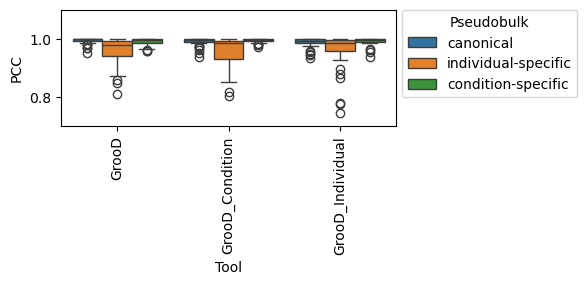

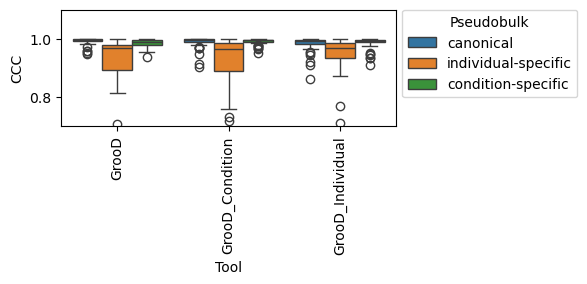

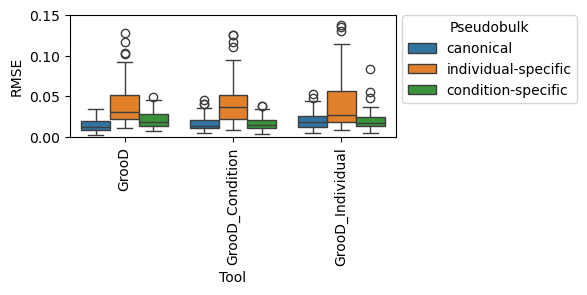

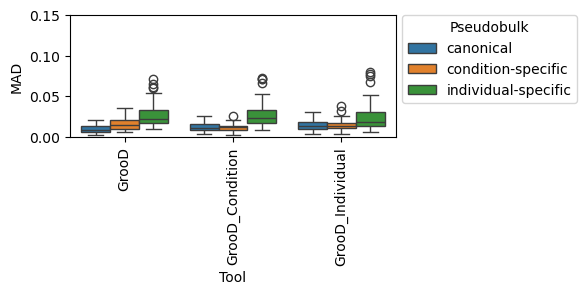

In [9]:
# Plot to visualize distribution of quality metrics

def boxplot_metrics(df, metric):

    """
    Creates boxplot of proportions per cell type across samples in pred
    pred: samples x cell types pandas dataframe
    output: target directory
    """

    df.sort_values(by=['Tool'], inplace=True)

    plt.figure(figsize=(6,3))
    p = sns.boxplot(data=df, x = "Tool", y = metric, hue = "Pseudobulk")
    p.set_xticklabels(p.get_xticklabels(), rotation=90)
    if metric in ['RMSE', 'MAD']:
        p.set_ylim([0,0.15])
    else:
        p.set_ylim([0.7,1.1])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Pseudobulk')
    plt.tight_layout()
    plt.savefig(f'Figure_2A_{metric}.svg', transparent = True, dpi = 300, format = 'svg')
    plt.show()

boxplot_metrics(complete_metrics, 'PCC')
boxplot_metrics(complete_metrics, 'CCC')
boxplot_metrics(complete_metrics, 'RMSE')
boxplot_metrics(complete_metrics, 'MAD')

### Figure 2B

In [10]:
pred = pd.read_csv('../grood_runs/benchmark/new_Hao_pb_tests/Benchmark_all/Hao-2_condition_pseudobulks_Hao_2_train_Hao-2_condition_pseudobulk_proprotions/evaluation/predictions_merged.csv', index_col=0)
pred.drop(['Unknown'], axis=1, inplace=True)
pred.head()

,tool,B cells,Monocytes,CD8 T cells,NK cells,Tregs,CD4 T cells,DC
sample,,,,,,,,
Batch2_sample_1,MuSiC,0.302845,0.097729,0.042754,0.381475,0.002803,0.000000,0.172394
Batch2_sample_2,MuSiC,0.014455,0.033200,0.109659,0.657199,0.029462,0.000000,0.156025
Batch2_sample_3,MuSiC,0.046170,0.114250,0.097190,0.112490,0.024811,0.544535,0.060555
Batch2_sample_4,MuSiC,0.308737,0.179024,0.151974,0.000000,0.024754,0.304566,0.030946
Batch2_sample_5,MuSiC,0.106430,0.012318,0.132734,0.426556,0.066345,0.000000,0.255617


In [11]:
groundTruth = pd.read_csv('../grood_runs/benchmark/pseudobulk_data/pseudobulk_data_random_proportions/Hao-2_condition_pseudobulk_proprotions.csv', index_col=0)
groundTruth.head()

,B cells,CD4 T cells,CD8 T cells,DC,Monocytes,NK cells,Tregs
Batch2_sample_1,0.327968,0.000000,0.012072,0.187123,0.078471,0.376258,0.018109
Batch2_sample_2,0.000000,0.056225,0.028112,0.170683,0.030120,0.688755,0.026104
Batch2_sample_3,0.062374,0.629779,0.022133,0.062374,0.110664,0.102616,0.010060
Batch2_sample_4,0.309859,0.450704,0.016097,0.030181,0.179074,0.000000,0.014085
Batch2_sample_5,0.118712,0.098592,0.002012,0.303823,0.000000,0.450704,0.026157


In [12]:
# Generate QC metrics per cell type and tool

def getCorr(df, groundTruth):

    """
    Computes correlation and error metrics for predicitions vs. ground-truth as stored in the MasterTable
    df: predictions
    groundTruth
    """


    rsquared = []
    cccs = []
    rmses = []
    spearmans = []
    percent_dev = []
    absol_dev = []

    # Concordance correlation coefficient
    def ccc(x_data,y_data):
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rhoc = 2*sxy / (np.var(x_data) + np.var(y_data) + (np.mean(x_data) - np.mean(y_data))**2)
        return rhoc


    # Pearson Correlation Coefficient
    def r(x_data,y_data):
        ''' Pearson Correlation Coefficient'''
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rho = sxy / (np.std(x_data)*np.std(y_data))
        return rho


    # RMSE
    def rmse(x_data,y_data):
        MSE = np.mean(np.square((np.array(x_data)-np.array(y_data))))
        RMSE = np.sqrt(MSE)
        return RMSE

    # Spearmans rank correlation    
    def spearman(x_data, y_data):
        spearmanCorr, _ = stats.spearmanr(np.array(x_data), np.array(y_data))
        return spearmanCorr
    
    # Percent deviation function
    def frac_deviation(x_data, y_data):
        frac_devs = np.mean(np.divide((np.array(y_data) - np.array(x_data)),np.array(x_data), where=(np.array(x_data)!=0)))
        return frac_devs # for sparse data, quite some data points might be excluded due to the removal of 0-divisions from the mean
    
    # Absolute deviation function
    def abs_deviation(x_data, y_data):
        abs_devs = np.mean(abs(np.array(y_data) - np.array(x_data)))
        return abs_devs

    cellTypes = groundTruth.columns.tolist()

    for cell in cellTypes:

        index_names = df.index.tolist()
        
        xdata = df.loc[index_names, cell].tolist()
        ydata = groundTruth.loc[index_names, cell].tolist()
        b = r(xdata, ydata)
        rsquared.append(b)
        s = spearman(xdata, ydata)
        spearmans.append(s)
        c = ccc(xdata, ydata)
        cccs.append(c)
        a = rmse(xdata, ydata)
        rmses.append(a)
        f = frac_deviation(xdata, ydata)
        percent_dev.append(f)
        g = abs_deviation(xdata, ydata)
        absol_dev.append(g)

    DF = pd.concat([pd.Series(rsquared), pd.Series(spearmans), pd.Series(cccs), pd.Series(rmses), pd.Series(percent_dev), pd.Series(absol_dev)], axis = 1, ignore_index = True)
    DF.columns = ['PCC', 'SCC', 'CCC', 'RMSE', 'RD', 'MAD']
    DF.index = cellTypes

    return DF

# Loop over tools

metrics_list = []

for tool in list(set(pred['tool'])):
    
    df = pred.loc[pred['tool'] == tool]

    metrics = getCorr(df, groundTruth)
    metrics['Tool'] = tool

    metrics_list.append(metrics)

complete_metrics = pd.concat(metrics_list, axis=0)
complete_metrics.head()

,PCC,SCC,CCC,RMSE,RD,MAD,Tool
B cells,0.990051,0.986338,0.988774,0.024208,0.195056,0.016873,MuSiC
CD4 T cells,0.732032,0.634052,0.729887,0.109953,0.911790,0.084308,MuSiC
CD8 T cells,0.796396,0.494220,0.773017,0.081831,1.165956,0.062860,MuSiC
DC,0.985699,0.985784,0.985143,0.026315,-0.005863,0.021007,MuSiC
Monocytes,0.994252,0.980670,0.993860,0.013684,0.005562,0.011004,MuSiC


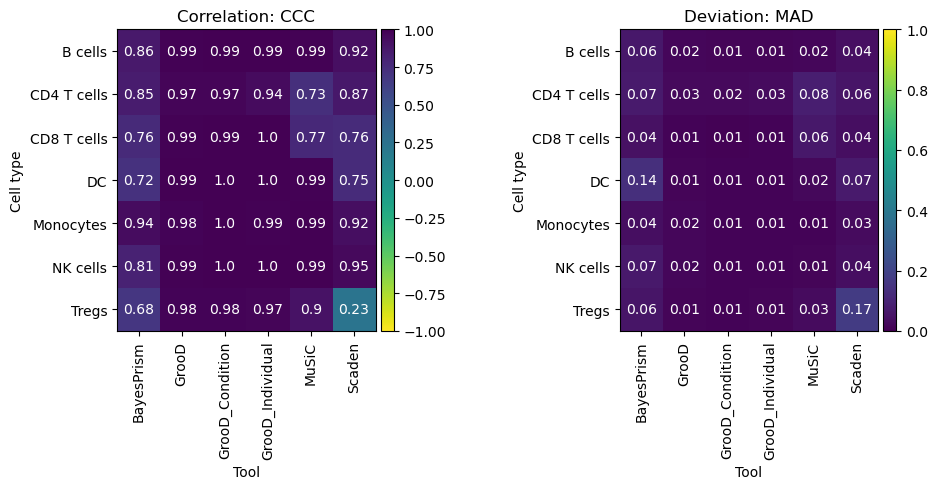

In [13]:
# Changed function for annotated heatmap

def annotated_heatmap(df, m1, m2):

    """"
    Visualizes correlation and error metrics computed with getCorr in heatmaps with fixed scales
    df: output from getCorr
    """

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    df1 = (
        df.reset_index(names="Cell type")[["Cell type", "Tool", m1]]
        .pivot(index="Cell type", columns="Tool", values=m1)
    )
    df2 = (
        df.reset_index(names="Cell type")[["Cell type", "Tool", m2]]
        .pivot(index="Cell type", columns="Tool", values=m2)
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    im1 = ax1.imshow(df1, vmin=-1, vmax=1, cmap='viridis_r')

    for i in range(df1.shape[0]):
        for j in range(df1.shape[1]): 
            ax1.annotate(str(round(df1.iloc[i,j], 2)), xy=(j, i), 
                        ha='center', va='center', color='white')

    ax1.set_title(f'Correlation: {m1}')
    ax1.set_xlabel('Tool')
    ax1.set_ylabel('Cell type')
    ax1.set_yticks(range(df1.shape[0]), df1.index.tolist())
    ax1.set_xticks(range(df1.shape[1]), df1.columns.tolist(), rotation = 'vertical')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im1, cax = cax, ax = ax1)

    im2 = ax2.imshow(df2, vmin=0, vmax=1, cmap='viridis')

    for i in range(df2.shape[0]):
        for j in range(df2.shape[1]): 
            ax2.annotate(str(round(df2.iloc[i,j], 2)), xy=(j, i), 
                        ha='center', va='center', color='white')

    ax2.set_title(f'Deviation: {m2}')
    ax2.set_xlabel('Tool')
    ax2.set_ylabel('Cell type')
    ax2.set_yticks(range(df2.shape[0]), df2.index.tolist())
    ax2.set_xticks(range(df2.shape[1]), df2.columns.tolist(), rotation = 'vertical')
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im2, cax = cax, ax = ax2)

    plt.tight_layout()
    plt.savefig('Figure_2B.svg', transparent = True, dpi = 300, format = 'svg')
    plt.show()

annotated_heatmap(complete_metrics, 'CCC', 'MAD')

### Figure 2C - Benchmark Hao Finotello

In [14]:
pred = pd.read_csv('../grood_runs/benchmark/Finotello_TPM_data_Hao_2_train_Finotello_FACS_proportions_no_neutrophils_others/evaluation/predictions_merged.csv', index_col=0)
pred.drop(['Unknown'], axis=1, inplace=True)
pred.head()

,tool,B cells,Monocytes,CD8 T cells,NK cells,Tregs,CD4 T cells,DC
sample,,,,,,,,
pbmc_1,MuSiC,0.012683,0.134626,0.000000,0.039479,0.0,0.491040,0.322172
pbmc_10,MuSiC,0.000000,0.300586,0.002412,0.000630,0.0,0.395211,0.301161
pbmc_12,MuSiC,0.001102,0.182731,0.002856,0.123661,0.0,0.451419,0.238231
pbmc_2,MuSiC,0.000000,0.144185,0.003350,0.000499,0.0,0.631471,0.220495
pbmc_4,MuSiC,0.055960,0.166105,0.000000,0.384662,0.0,0.175851,0.217422


In [15]:
groundTruth = pd.read_csv('../data/bulk_data/Finotello_2019/final_data/Finotello_FACS_proportions_no_neutrophils_others.csv', index_col=0)
groundTruth.head()

,NK cells,B cells,Tregs,DC,Monocytes,CD8 T cells,CD4 T cells
pbmc_1,0.0675,0.0581,0.0175,0.0160,0.2001,0.1564,0.3796
pbmc_10,0.0718,0.0640,0.0084,0.0227,0.3586,0.1839,0.1786
pbmc_12,0.1409,0.0516,0.0050,0.0426,0.2003,0.2984,0.1533
pbmc_2,0.1128,0.0296,0.0143,0.0234,0.2481,0.1638,0.2552
pbmc_4,0.1154,0.0384,0.0097,0.0357,0.1943,0.2452,0.2247


In [16]:
# Generate QC metrics per cell type and tool

def getCorr(df, groundTruth):

    """
    Computes correlation and error metrics for predicitions vs. ground-truth as stored in the MasterTable
    df: predictions
    groundTruth
    """


    rsquared = []
    cccs = []
    rmses = []
    spearmans = []
    percent_dev = []
    absol_dev = []

    # Concordance correlation coefficient
    def ccc(x_data,y_data):
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rhoc = 2*sxy / (np.var(x_data) + np.var(y_data) + (np.mean(x_data) - np.mean(y_data))**2)
        return rhoc


    # Pearson Correlation Coefficient
    def r(x_data,y_data):
        ''' Pearson Correlation Coefficient'''
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rho = sxy / (np.std(x_data)*np.std(y_data))
        return rho


    # RMSE
    def rmse(x_data,y_data):
        MSE = np.mean(np.square((np.array(x_data)-np.array(y_data))))
        RMSE = np.sqrt(MSE)
        return RMSE

    # Spearmans rank correlation    
    def spearman(x_data, y_data):
        spearmanCorr, _ = stats.spearmanr(np.array(x_data), np.array(y_data))
        return spearmanCorr
    
    # Percent deviation function
    def frac_deviation(x_data, y_data):
        frac_devs = np.mean(np.divide((np.array(y_data) - np.array(x_data)),np.array(x_data), where=(np.array(x_data)!=0)))
        return frac_devs # for sparse data, quite some data points might be excluded due to the removal of 0-divisions from the mean
    
    # Absolute deviation function
    def abs_deviation(x_data, y_data):
        abs_devs = np.mean(abs(np.array(y_data) - np.array(x_data)))
        return abs_devs

    cellTypes = groundTruth.columns.tolist()

    for cell in cellTypes:

        index_names = df.index.tolist()
        
        xdata = df.loc[index_names, cell].tolist()
        ydata = groundTruth.loc[index_names, cell].tolist()
        b = r(xdata, ydata)
        rsquared.append(b)
        s = spearman(xdata, ydata)
        spearmans.append(s)
        c = ccc(xdata, ydata)
        cccs.append(c)
        a = rmse(xdata, ydata)
        rmses.append(a)
        f = frac_deviation(xdata, ydata)
        percent_dev.append(f)
        g = abs_deviation(xdata, ydata)
        absol_dev.append(g)

    DF = pd.concat([pd.Series(rsquared), pd.Series(spearmans), pd.Series(cccs), pd.Series(rmses), pd.Series(percent_dev), pd.Series(absol_dev)], axis = 1, ignore_index = True)
    DF.columns = ['PCC', 'SCC', 'CCC', 'RMSE', 'RD', 'MAD']
    DF.index = cellTypes

    return DF

# Loop over tools

metrics_list = []

for tool in list(set(pred['tool'])):
    
    df = pred.loc[pred['tool'] == tool]

    metrics = getCorr(df, groundTruth)
    metrics['Tool'] = tool

    metrics_list.append(metrics)

complete_metrics = pd.concat(metrics_list, axis=0)
complete_metrics.head()

,PCC,SCC,CCC,RMSE,RD,MAD,Tool
NK cells,0.115559,0.450000,0.048551,0.141763,40.970775,0.105501,MuSiC
B cells,-0.284926,-0.174078,-0.052297,0.048145,27.162131,0.045943,MuSiC
Tregs,NaN,NaN,0.000000,0.010727,0.000000,0.010144,MuSiC
DC,-0.369531,-0.200000,-0.006837,0.245153,-0.874855,0.238146,MuSiC
Monocytes,0.783823,0.800000,0.608071,0.056015,0.236946,0.045009,MuSiC


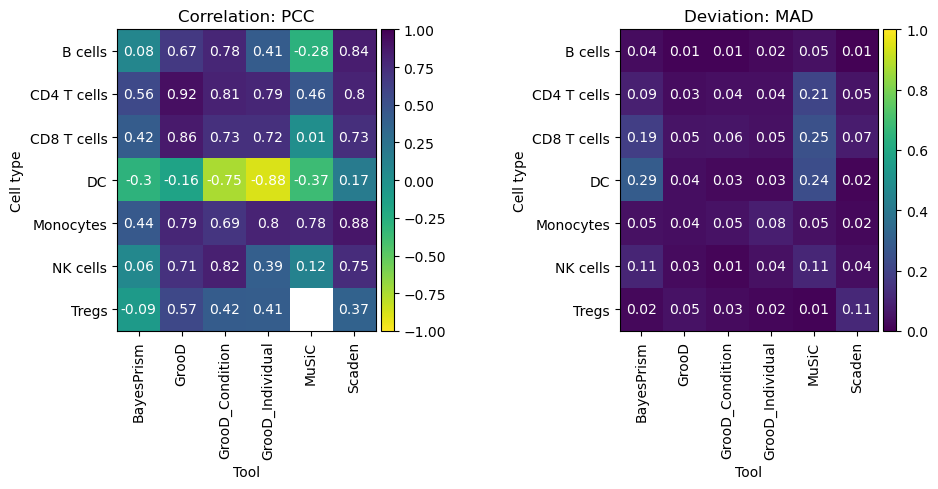

In [17]:
# Changed function for annotated heatmap

def annotated_heatmap(df, m1, m2):

    """"
    Visualizes correlation and error metrics computed with getCorr in heatmaps with fixed scales
    df: output from getCorr
    """

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    df1 = (
        df.reset_index(names="Cell type")[["Cell type", "Tool", m1]]
        .pivot(index="Cell type", columns="Tool", values=m1)
    )
    df2 = (
        df.reset_index(names="Cell type")[["Cell type", "Tool", m2]]
        .pivot(index="Cell type", columns="Tool", values=m2)
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    im1 = ax1.imshow(df1, vmin=-1, vmax=1, cmap='viridis_r')

    for i in range(df1.shape[0]):
        for j in range(df1.shape[1]): 
            ax1.annotate(str(round(df1.iloc[i,j], 2)), xy=(j, i), 
                        ha='center', va='center', color='white')

    ax1.set_title(f'Correlation: {m1}')
    ax1.set_xlabel('Tool')
    ax1.set_ylabel('Cell type')
    ax1.set_yticks(range(df1.shape[0]), df1.index.tolist())
    ax1.set_xticks(range(df1.shape[1]), df1.columns.tolist(), rotation = 'vertical')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im1, cax = cax, ax = ax1)

    im2 = ax2.imshow(df2, vmin=0, vmax=1, cmap='viridis')

    for i in range(df2.shape[0]):
        for j in range(df2.shape[1]): 
            ax2.annotate(str(round(df2.iloc[i,j], 2)), xy=(j, i), 
                        ha='center', va='center', color='white')

    ax2.set_title(f'Deviation: {m2}')
    ax2.set_xlabel('Tool')
    ax2.set_ylabel('Cell type')
    ax2.set_yticks(range(df2.shape[0]), df2.index.tolist())
    ax2.set_xticks(range(df2.shape[1]), df2.columns.tolist(), rotation = 'vertical')
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im2, cax = cax, ax = ax2)

    plt.tight_layout()
    plt.savefig('Figure_2C.svg', transparent = True, dpi = 300, format = 'svg')
    plt.show()

annotated_heatmap(complete_metrics, 'PCC', 'MAD')

### Figure 2D - Deconvolution BIU - OConnell

In [18]:
# Get convolution results using Hao and Finotello data account for cell type proportions

pred = pd.read_csv('../grood_runs/benchmark/OConnell_TPM_data_BIU_7_train_OConnell_proportions_no_eosinophils/evaluation/predictions_merged.csv', index_col=0)
pred.drop(['Unknown'], axis=1, inplace=True)
pred.head()

,tool,Lymphocytes,Neutrophils,Monocytes
sample,,,,
SRR23992103,MuSiC,0.0,0.000000,1.000000
SRR23992114,MuSiC,0.0,0.000000,1.000000
SRR23992093,MuSiC,0.0,0.000000,1.000000
SRR23992144,MuSiC,0.0,0.000000,1.000000
SRR23992210,MuSiC,0.0,0.005814,0.994186


In [19]:
pred

,tool,Lymphocytes,Neutrophils,Monocytes
sample,,,,
SRR23992103,MuSiC,0.000000,0.000000,1.000000
SRR23992114,MuSiC,0.000000,0.000000,1.000000
SRR23992093,MuSiC,0.000000,0.000000,1.000000
SRR23992144,MuSiC,0.000000,0.000000,1.000000
SRR23992210,MuSiC,0.000000,0.005814,0.994186
...,...,...,...,...
SRR23992194,Scaden,0.132461,0.412989,0.454550
SRR23992178,Scaden,0.248398,0.356034,0.395568
SRR23992119,Scaden,0.299999,0.288257,0.411744


In [20]:
groundTruth = pd.read_csv('../data/bulk_data/OConnell_2024/OConnell_proportions_no_eosinophils.csv', index_col=0)
groundTruth

,Lymphocytes,Monocytes,Neutrophils
Run,,,
SRR23992103,0.059,0.030,0.905
SRR23992114,0.322,0.085,0.576
SRR23992093,0.273,0.061,0.620
SRR23992144,0.099,0.139,0.733
SRR23992210,0.207,0.052,0.731
...,...,...,...
SRR23992194,0.104,0.060,0.806
SRR23992178,0.271,0.070,0.655
SRR23992119,0.234,0.094,0.640


In [21]:
# Generate QC metrics per cell type and tool

def getCorr(df, groundTruth):

    """
    Computes correlation and error metrics for predicitions vs. ground-truth as stored in the MasterTable
    df: predictions
    groundTruth
    """


    rsquared = []
    cccs = []
    rmses = []
    spearmans = []
    percent_dev = []
    absol_dev = []

    # Concordance correlation coefficient
    def ccc(x_data,y_data):
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rhoc = 2*sxy / (np.var(x_data) + np.var(y_data) + (np.mean(x_data) - np.mean(y_data))**2)
        return rhoc


    # Pearson Correlation Coefficient
    def r(x_data,y_data):
        ''' Pearson Correlation Coefficient'''
        sxy = np.sum((x_data - np.mean(x_data))*(y_data - np.mean(y_data)))/len(x_data)
        rho = sxy / (np.std(x_data)*np.std(y_data))
        return rho


    # RMSE
    def rmse(x_data,y_data):
        MSE = np.mean(np.square((np.array(x_data)-np.array(y_data))))
        RMSE = np.sqrt(MSE)
        return RMSE

    # Spearmans rank correlation    
    def spearman(x_data, y_data):
        spearmanCorr, _ = stats.spearmanr(np.array(x_data), np.array(y_data))
        return spearmanCorr
    
    # Percent deviation function
    def frac_deviation(x_data, y_data):
        frac_devs = np.mean(np.divide((np.array(y_data) - np.array(x_data)),np.array(x_data), where=(np.array(x_data)!=0)))
        return frac_devs # for sparse data, quite some data points might be excluded due to the removal of 0-divisions from the mean
    
    # Absolute deviation function
    def abs_deviation(x_data, y_data):
        abs_devs = np.mean(abs(np.array(y_data) - np.array(x_data)))
        return abs_devs

    samples = groundTruth.index.tolist()

    for sample in samples:
        
        xdata = df.loc[sample].tolist()
        ydata = groundTruth.loc[sample].tolist()
        b = r(xdata, ydata)
        rsquared.append(b)
        s = spearman(xdata, ydata)
        spearmans.append(s)
        c = ccc(xdata, ydata)
        cccs.append(c)
        a = rmse(xdata, ydata)
        rmses.append(a)
        f = frac_deviation(xdata, ydata)
        percent_dev.append(f)
        g = abs_deviation(xdata, ydata)
        absol_dev.append(g)

    DF = pd.concat([pd.Series(rsquared), pd.Series(spearmans), pd.Series(cccs), pd.Series(rmses), pd.Series(percent_dev), pd.Series(absol_dev)], axis = 1, ignore_index = True)
    DF.columns = ['PCC', 'SCC', 'CCC', 'RMSE', 'RD', 'MAD']
    DF.index = samples

    return DF

# Loop over tools

metrics_list = []

for tool in list(set(pred['tool'])):
    
    df = pred.loc[pred['tool'] == tool]
    df.drop(['tool'], axis=1, inplace=True)
    df.sort_index(axis=1, inplace=True)
    gt = groundTruth
    gt.sort_index(axis=1, inplace=True)

    metrics = getCorr(df, gt)
    metrics['Tool'] = tool

    metrics_list.append(metrics)

complete_metrics = pd.concat(metrics_list, axis=0)
complete_metrics.head()

,PCC,SCC,CCC,RMSE,RD,MAD,Tool
SRR23992103,0.837927,0.5,0.620425,0.273441,-0.243826,0.238508,Scaden
SRR23992114,-0.971655,-1.0,-0.639416,0.274327,0.199887,0.235992,Scaden
SRR23992093,0.528057,0.5,0.515096,0.206706,0.420890,0.184797,Scaden
SRR23992144,0.159702,0.5,0.113801,0.296073,-0.019043,0.264209,Scaden
SRR23992210,0.816799,0.5,0.123216,0.272838,-0.050820,0.249266,Scaden


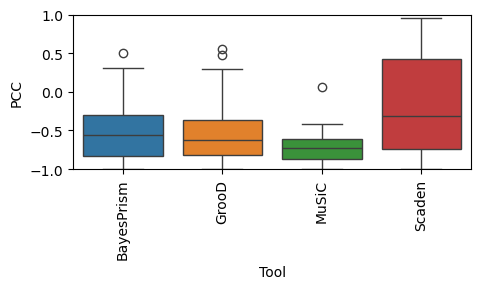

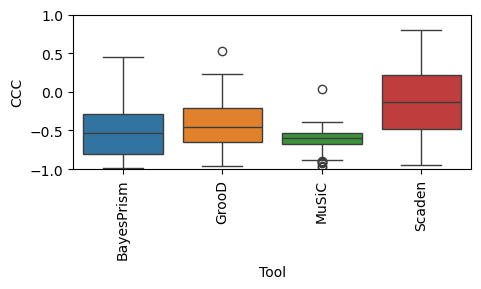

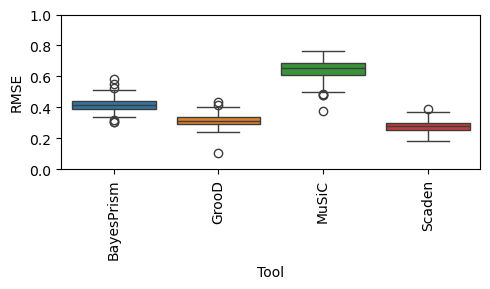

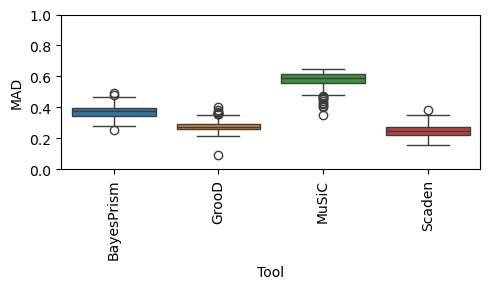

In [22]:
# Plot to visualize distribution of quality metrics

def boxplot_metrics(df, metric):

    """
    Creates boxplot of proportions per cell type across samples in pred
    pred: samples x cell types pandas dataframe
    output: target directory
    """

    df.sort_values(by=['Tool'], inplace=True)

    plt.figure(figsize=(5,3))
    p = sns.boxplot(data=df, x = "Tool", y = metric, hue = "Tool")
    p.set_xticklabels(p.get_xticklabels(), rotation=90)
    if metric in ['RMSE', 'MAD']:
        p.set_ylim([0,1])
    else:
        p.set_ylim([-1,1])
    plt.tight_layout()
    plt.savefig(f'Figure_2D_{metric}.svg', transparent = True, dpi = 300, format = 'svg')
    plt.show()

boxplot_metrics(complete_metrics, 'PCC')
boxplot_metrics(complete_metrics, 'CCC')
boxplot_metrics(complete_metrics, 'RMSE')
boxplot_metrics(complete_metrics, 'MAD')

### SI Figure 2

In [23]:
# Get convolution results using Hao and Finotello data account for cell type proportions
eval_res = pd.read_csv('Convolution/OConnell_TPM_data_BIU_7_train_metrics.csv', index_col=0)
# eval_res = eval_res.loc[eval_res['filter_strategy'] == 'mRNA']
eval_res = eval_res.loc[eval_res['space'] == 'CPM']
eval_res = eval_res.loc[eval_res['metric'].isin(['Pearson', 'CCC', '1-JSD'])]
eval_res.replace({'Pearson' : 'PCC'}, inplace=True)
eval_res.replace({'none' : 'all', 'mRNA' : 'coding only'}, inplace=True)
eval_res.head()

,filter_strategy,space,metric,value
0,all,CPM,1-JSD,0.570943
1,all,CPM,PCC,0.462026
3,all,CPM,CCC,0.409029
8,all,CPM,1-JSD,0.568185
9,all,CPM,PCC,0.469060


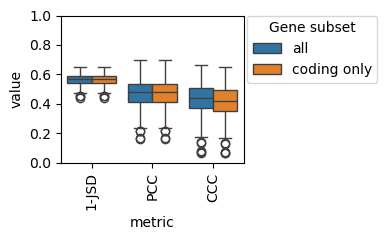

In [25]:
# Plot to visualize distribution of quality metrics

def boxplot_metrics(df):

    """
    Creates boxplot of proportions per cell type across samples in pred
    pred: samples x cell types pandas dataframe
    output: target directory
    """
    plt.figure(figsize=(4,2.5))
    p = sns.boxplot(data=df, x = "metric", y = "value", hue = "filter_strategy")
    p.set_xticklabels(p.get_xticklabels(), rotation=90)
    p.set_ylim([0,1])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Gene subset')
    plt.tight_layout()
    plt.savefig('SI_Figure_2.svg', transparent = True, dpi = 300, format = 'svg')
    plt.show()

boxplot_metrics(eval_res)